<a href="https://colab.research.google.com/github/Davron030901/Matplotlib_and_Seaborn/blob/main/23_PairGrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seaborn: PairGrid

In [ ]:
import seaborn as sns

from matplotlib import pyplot as plt

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Basics

In [ ]:
sns.set_style('darkgrid')

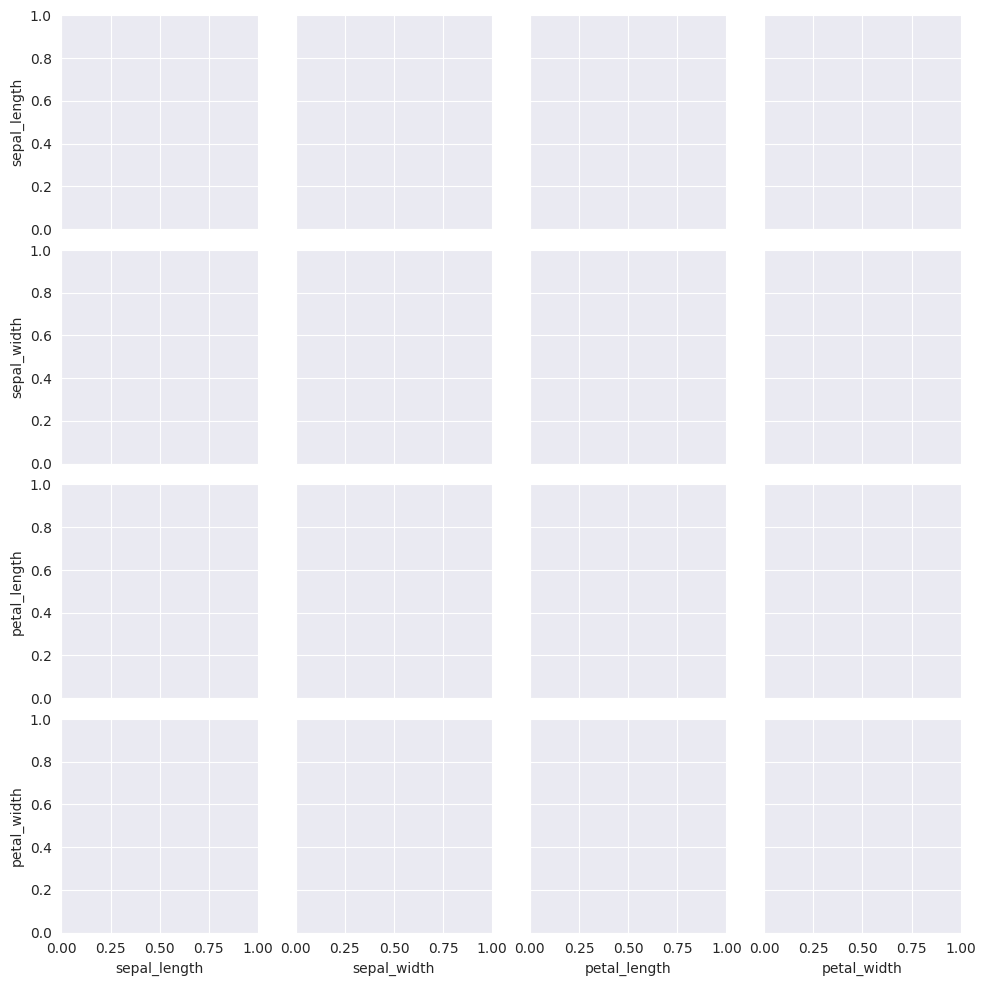

In [ ]:
g = sns.PairGrid(iris)

In [ ]:
type(g)

seaborn.axisgrid.PairGrid

### `.map()`

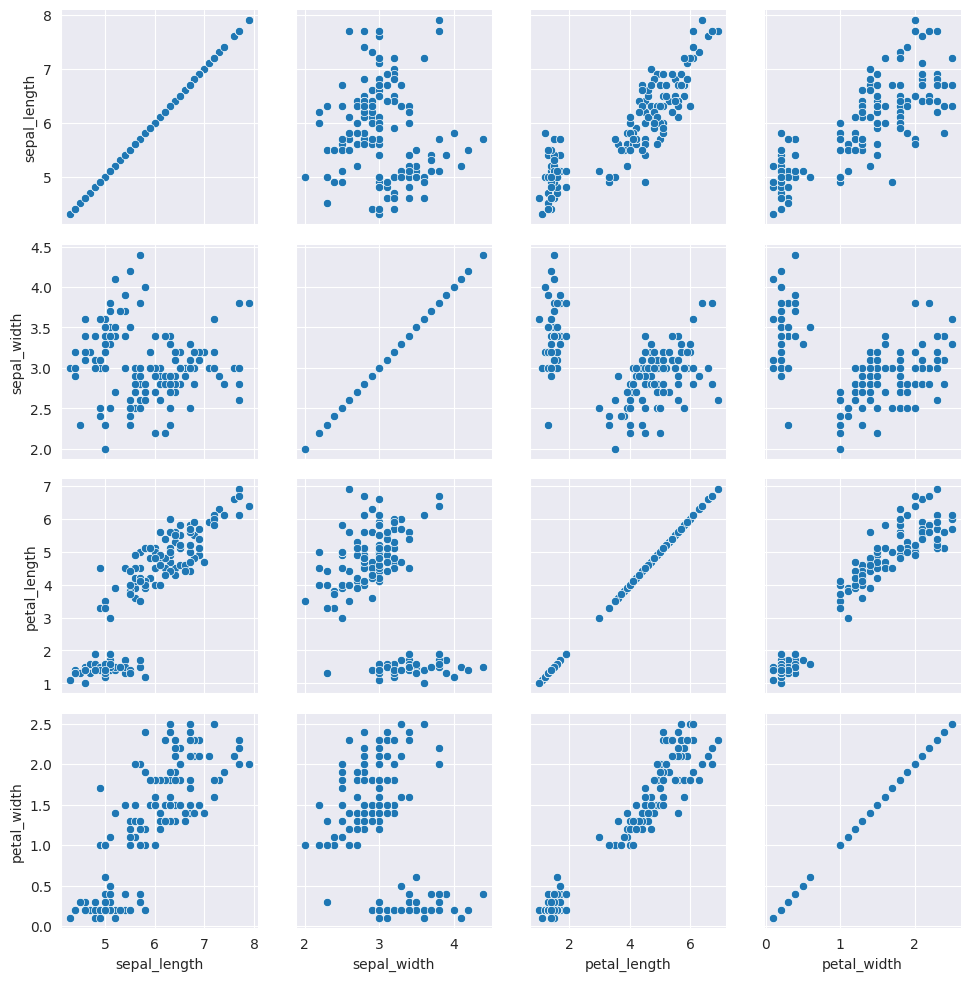

In [ ]:
g = sns.PairGrid(iris)
g.map(sns.scatterplot)

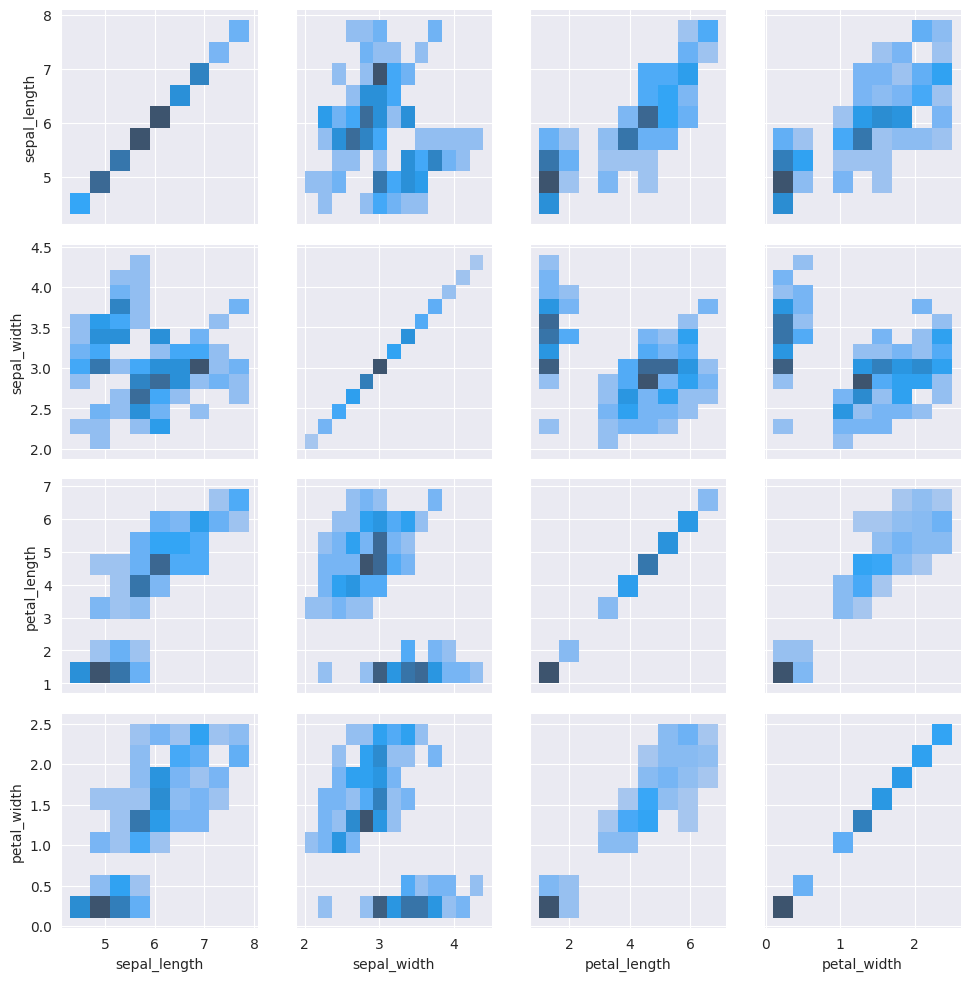

In [ ]:
g = sns.PairGrid(iris)
g.map(sns.histplot)

### Matplotlib Functions

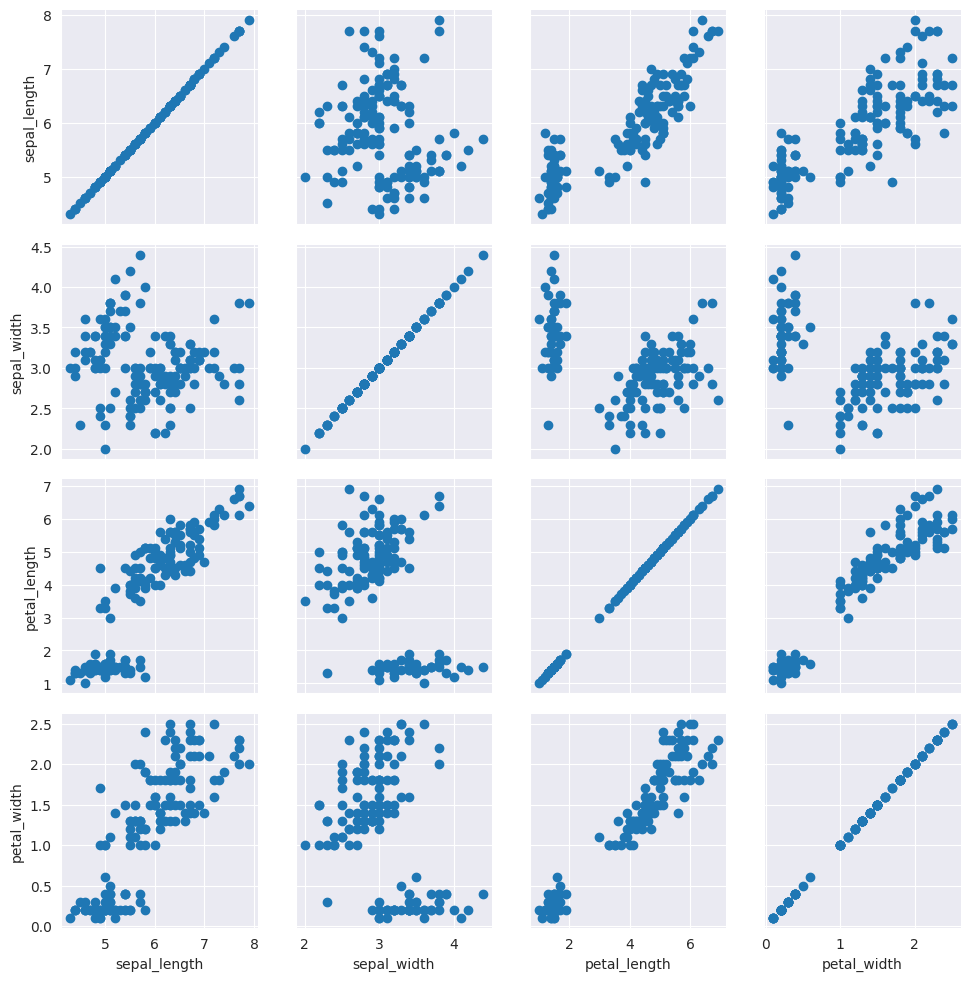

In [ ]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

## PairGrid Anatomy

### `.map_diag()` and `.map_offdiag()`

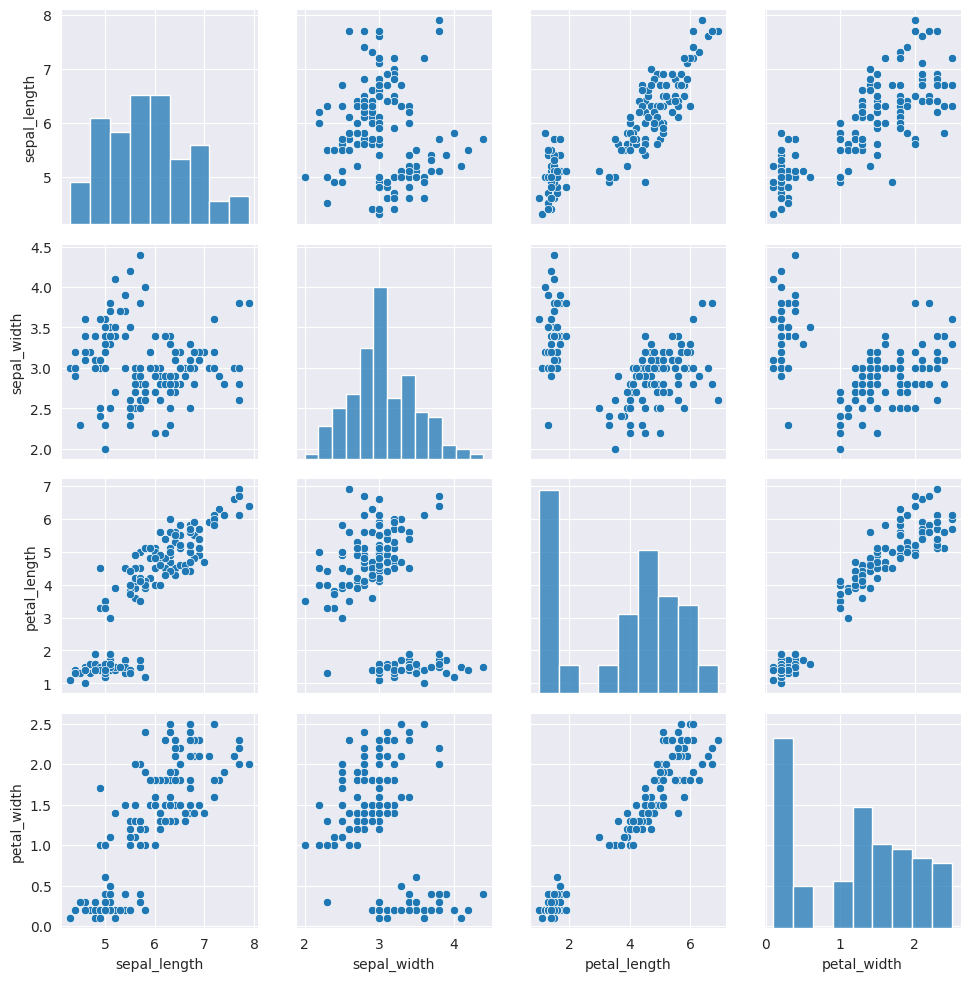

In [ ]:
g = sns.PairGrid(iris)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

### `.map_upper()` and `.map_lower()`

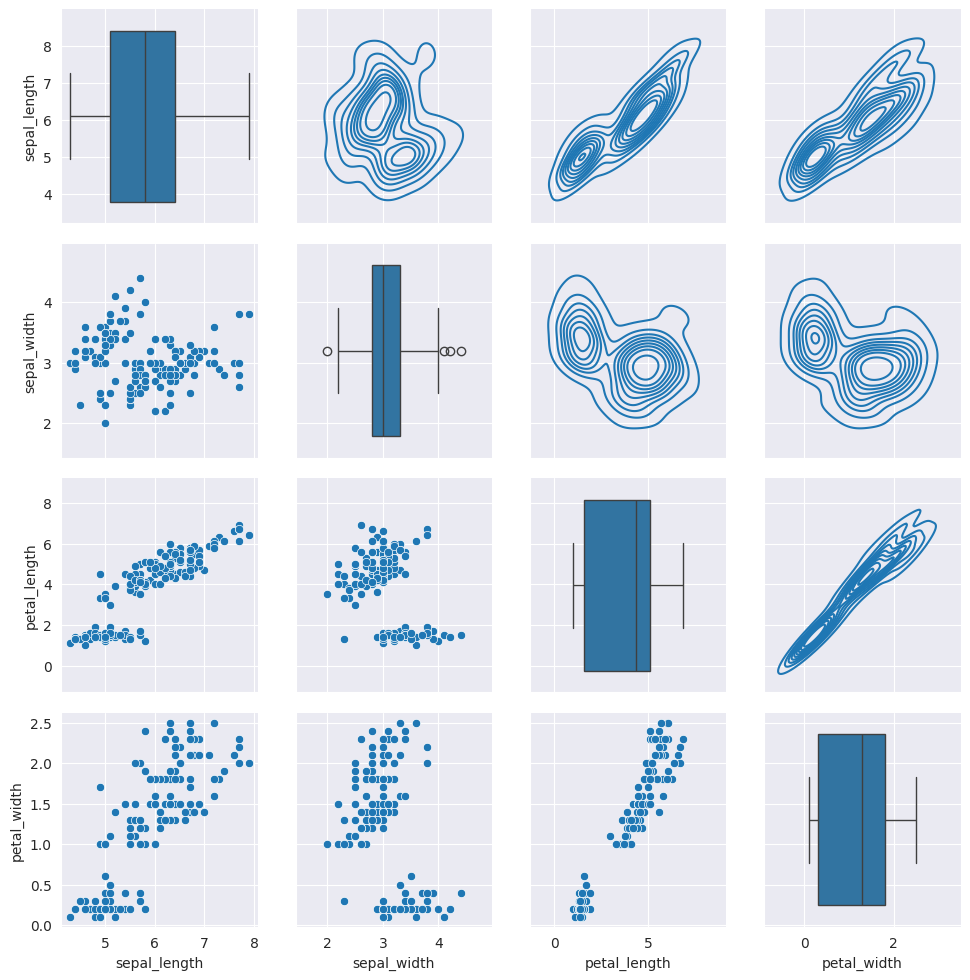

In [ ]:
g = sns.PairGrid(iris)
g.map_lower(sns.scatterplot)
g.map_diag(sns.boxplot)
g.map_upper(sns.kdeplot)

### `corner`

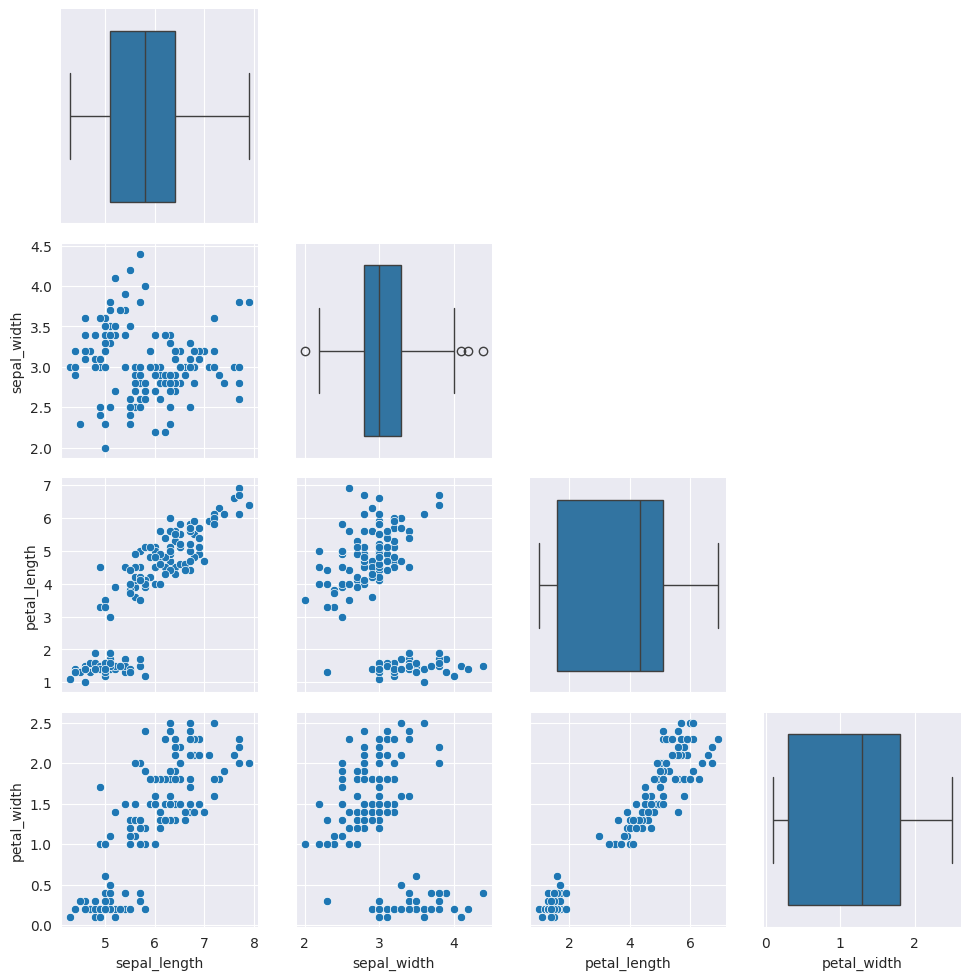

In [ ]:
g = sns.PairGrid(iris, corner=True)
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.boxplot)

## Additional Options

### `hue`

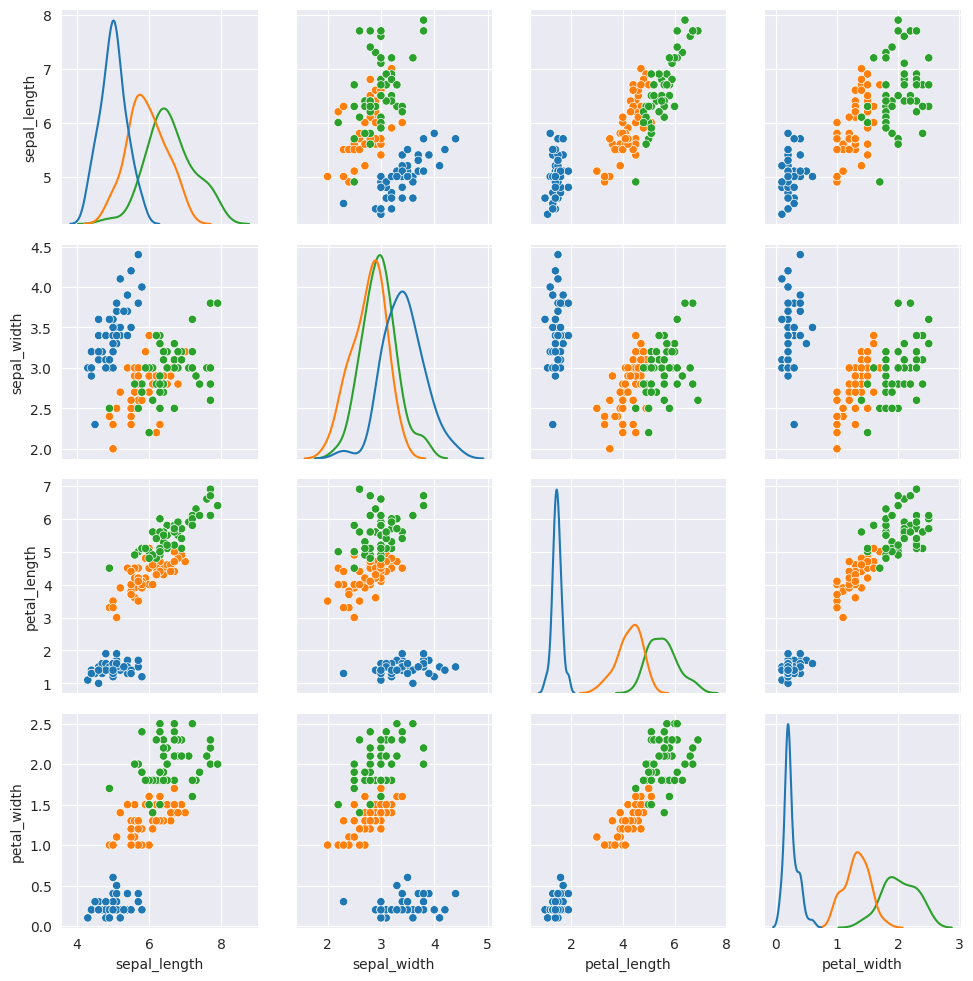

In [ ]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

### `vars`

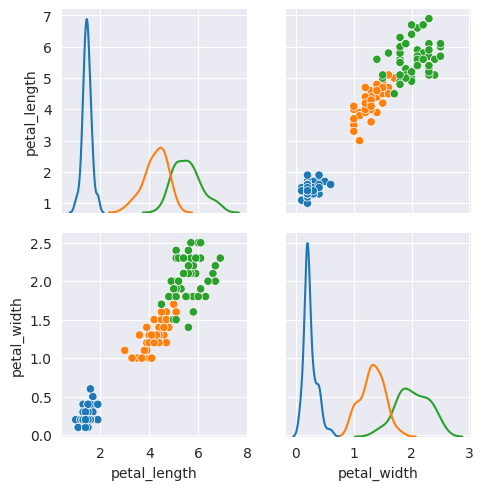

In [ ]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, vars=['petal_length', 'petal_width'])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

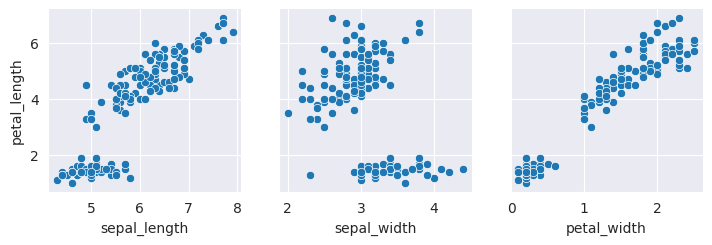

In [ ]:
g = sns.PairGrid(iris,
                 x_vars=['sepal_length', 'sepal_width', 'petal_width'],
                 y_vars=['petal_length']
                )
g.map(sns.scatterplot)

## Styling

### Plot-specific Keywords

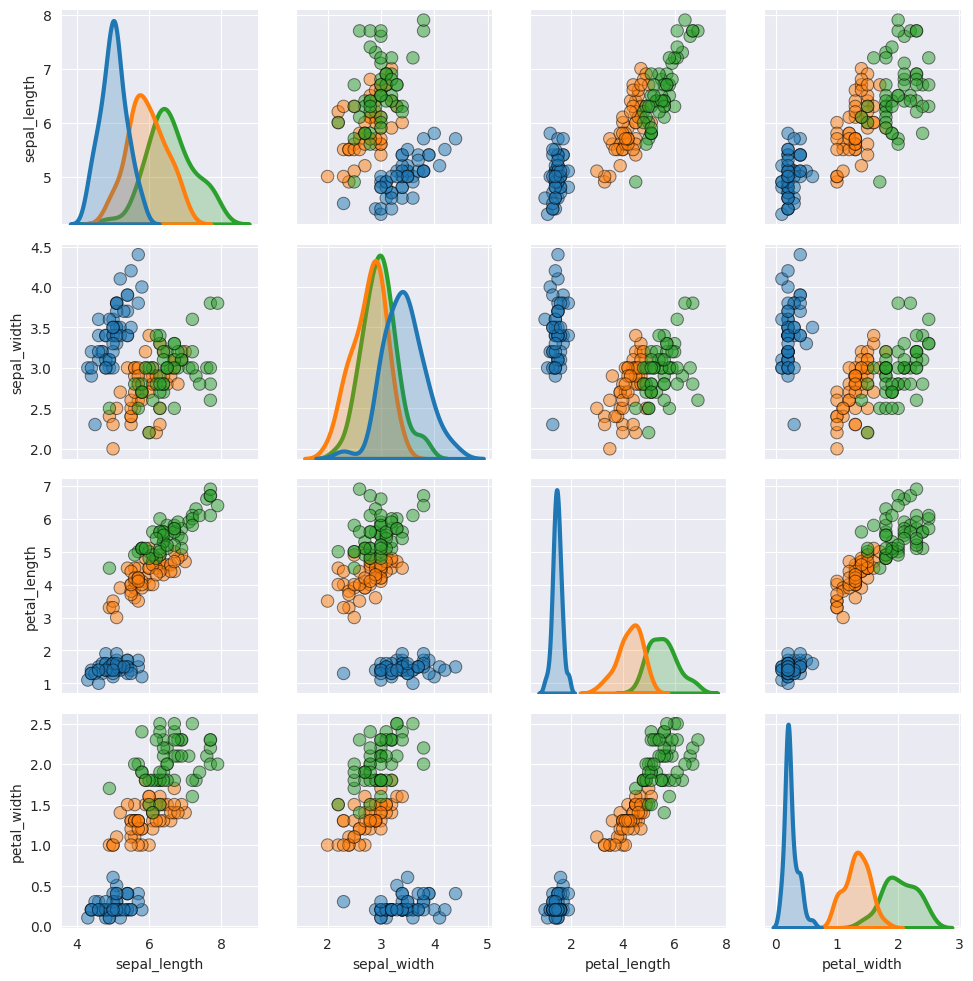

In [ ]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False)
g.map_diag(sns.kdeplot, fill=True, lw=3)
g.map_offdiag(sns.scatterplot, s=80, alpha=.5, ec='black')

### `height`, `aspect`

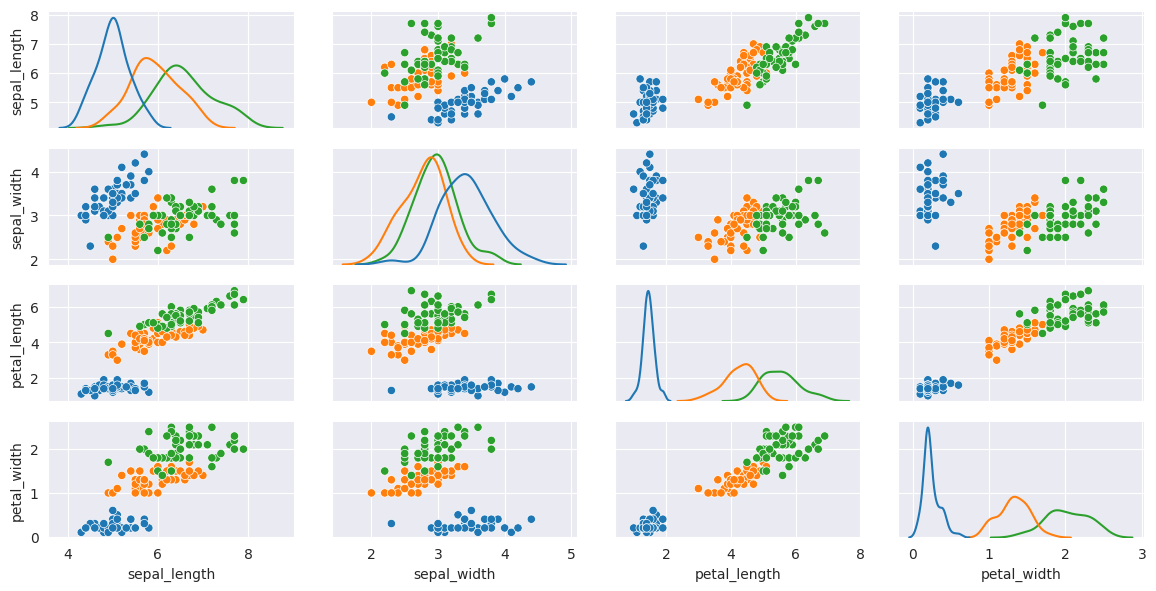

In [ ]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, height=1.5, aspect=2)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

### `palette`

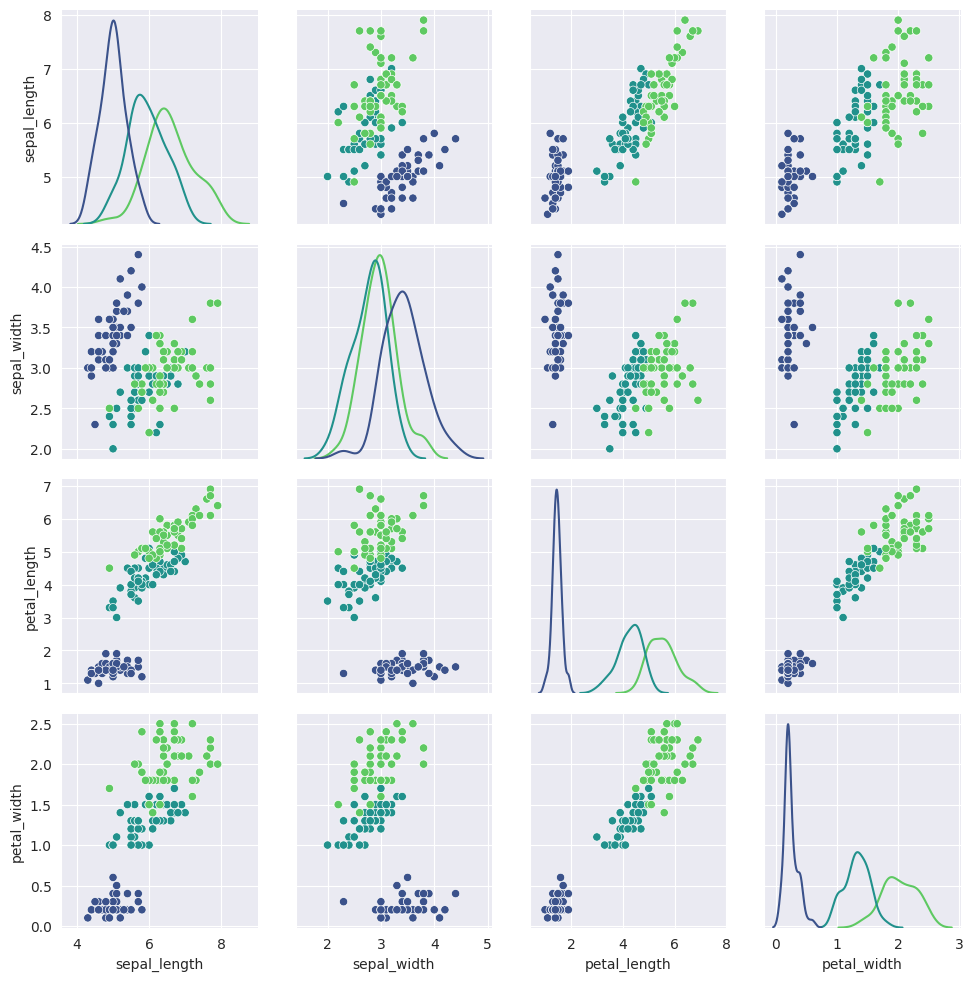

In [ ]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, palette='viridis')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)

### `.add_legend()`

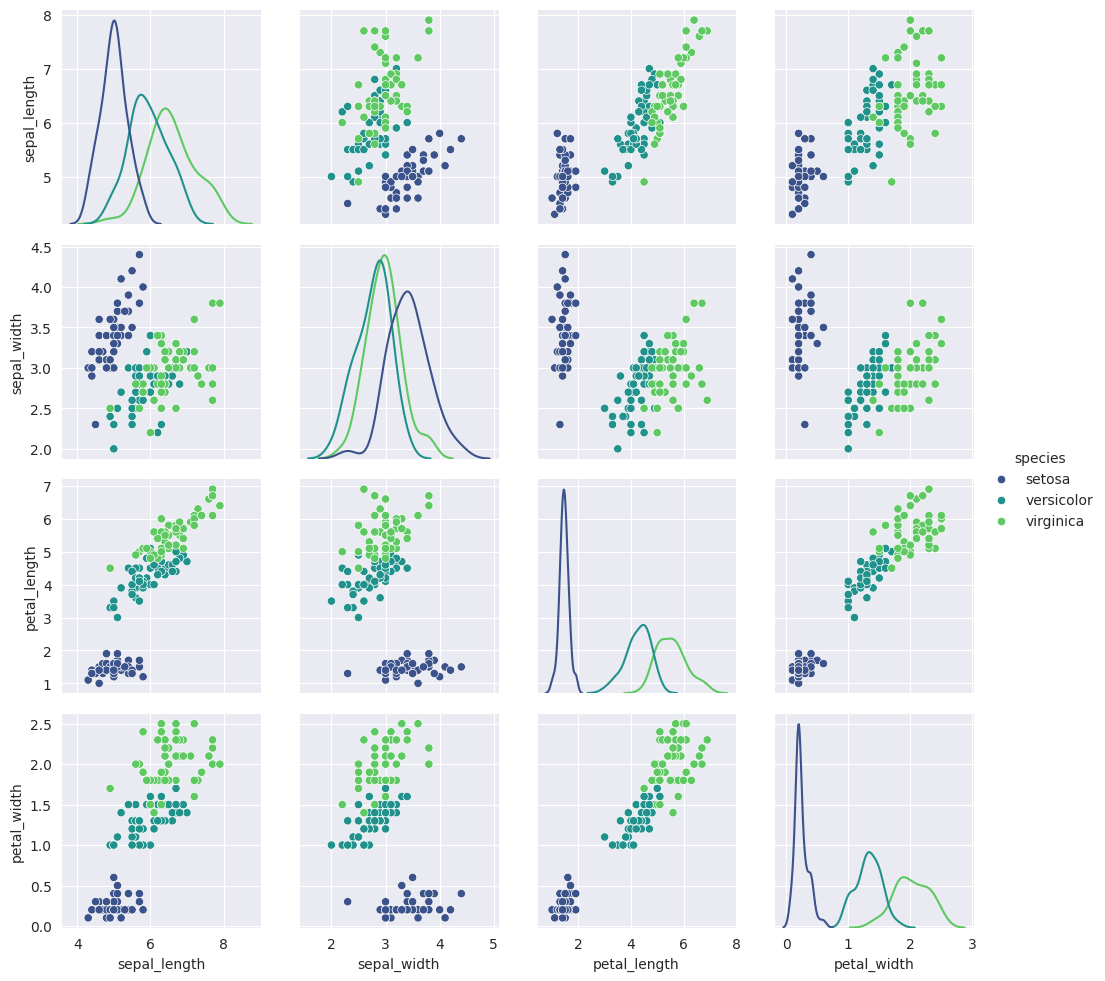

In [ ]:
g = sns.PairGrid(iris, hue='species', diag_sharey=False, palette='viridis')
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [ ]:
g.palette    #g. + TAB shows you methods and properties of the PairGrid

[(0.229739, 0.322361, 0.545706),
 (0.127568, 0.566949, 0.550556),
 (0.369214, 0.788888, 0.382914)]

## Thumbnail and Overlays

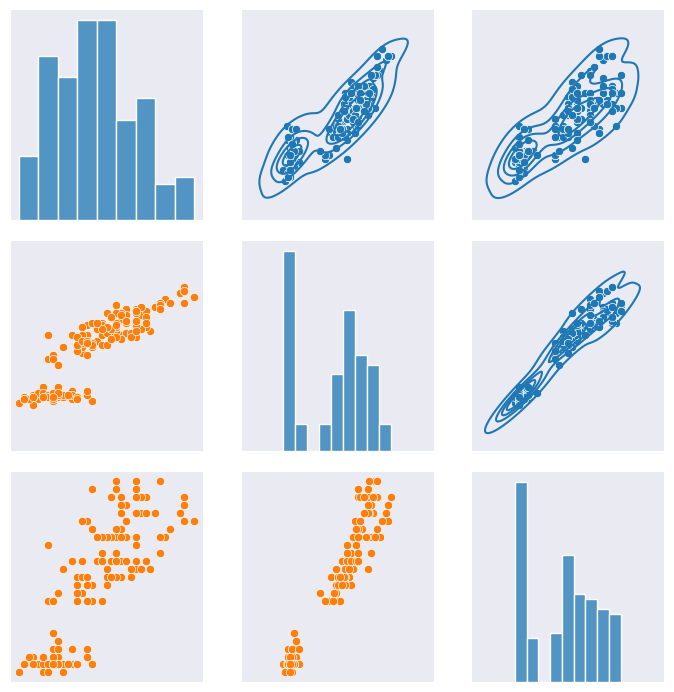

In [ ]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot, n_levels=5)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
g.savefig('23pairgrid_image_blank.png', dpi=200)
g.savefig('23pairgrid_image_maindiag.png', dpi=200)
g.savefig('23pairgrid_image_offdiag.png', dpi=200)
g.savefig('23pairgrid_image_differentdiag.png', dpi=200)

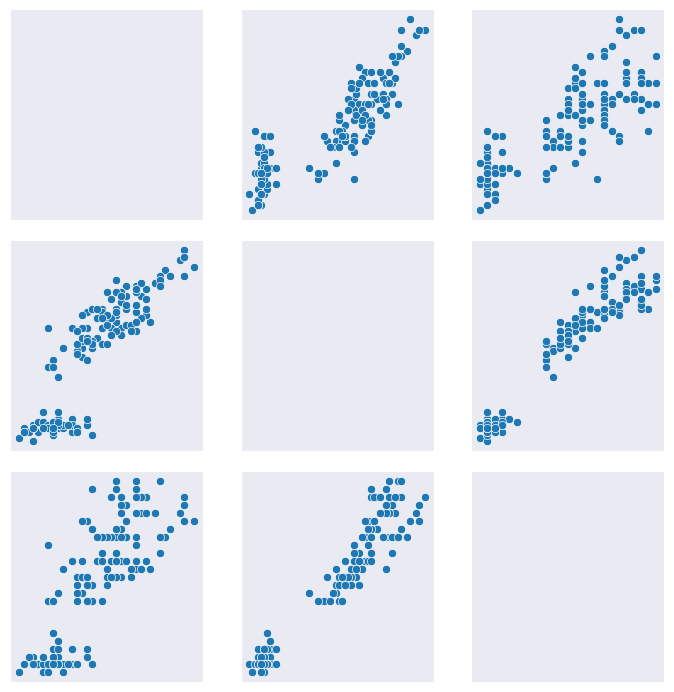

In [ ]:
g = sns.PairGrid(iris, vars=['sepal_length','petal_length', 'petal_width'], diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])
g.savefig('23pairgrid_image_lowertri.png', dpi=200)
g.savefig('23pairgrid_image_uppertri.png', dpi=200)

### Thumbnail

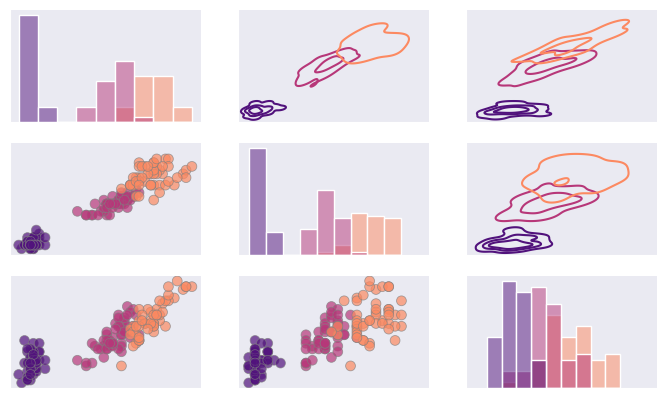

In [ ]:
g = sns.PairGrid(
    iris,
    hue='species',
    palette='magma',
    vars=['petal_length', 'petal_width', 'sepal_length'],
    height=1.5,
    aspect=1.65,
    diag_sharey=False
)

# Lower triangle: Scatter plot with hue='species' (uses the palette)
g.map_lower(sns.scatterplot, s=50, alpha=0.7, ec='gray')

# Diagonal: Histograms with a single color
g.map_diag(sns.histplot, color='navy')  # Removed `hue=None` since it's unnecessary

# Upper triangle: KDE plots with a single color
g.map_upper(sns.kdeplot, n_levels=4, color='mediumvioletred')  # Removed `hue=None` since it's unnecessary

# Customize axes appearance
for var in g.axes:
    for ax in var:
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_xticks([])
        ax.set_yticks([])

# Save the figure
g.savefig('23pairgrid_image_thumb.png', dpi=200)